# 形态学实验——二值图像

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
def read_txt(path):
    with open(path, 'r') as file:
        lines = file.readlines()
    height = len(lines)
    width = len(lines[0].strip().split(',')) 
    image_data = np.zeros((height, width), dtype=np.uint8)
    for i, line in enumerate(lines):
        numbers = line.strip().split(',')
        image_data[i] = np.array([int(num) for num in numbers])
    return image_data * 255

def vis(image_data):
    # image_data = image_data * 255
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')  # 关闭坐标轴
    plt.show()


## 1.读取butterfly.txt图像。维度为340*325。原始图像记作I_0。

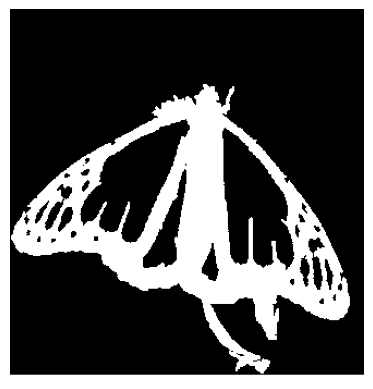

In [8]:
I_0 = read_txt(r'../形态学-二值/butterfly.txt')
vis(I_0)

## 2.开操作与闭操作：

![第二题](../实验代码/binary_img/第二题.png)

### a)

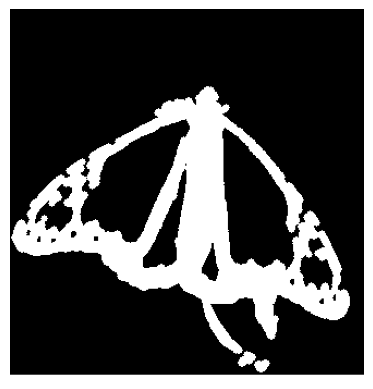

In [9]:
se_1 = read_txt(r'/Users/xuefeng/Documents/数字图像处理课程/形态学实验/形态学-二值/se_1.txt')
I_0_se_1_1 = cv2.morphologyEx(I_0, cv2.MORPH_OPEN, se_1)
vis(I_0_se_1_1)

通过先腐蚀再膨胀处理图像。蚀缩小白色区域，去除了图像中不能完全覆盖结构元的小噪声点。膨胀步骤恢复了腐蚀过程中丢失的较大结构，使得图像的主要形状保持完整，边缘更加平滑。

### b)

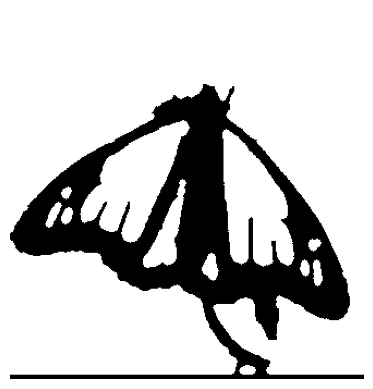

In [10]:
I_0_c = cv2.bitwise_not(I_0)
# vis(I_0_c)
I_0_c_se_1_2 = cv2.morphologyEx(I_0_c, cv2.MORPH_OPEN, se_1)
vis(I_0_c_se_1_2)

开操作先腐蚀这些新的白色区域，去除其中小的噪声点，然后膨胀恢复其主要结构,
这使得原本的黑色区域变得更加光滑和连贯，原来的白色区域则被进一步简化。

### c)

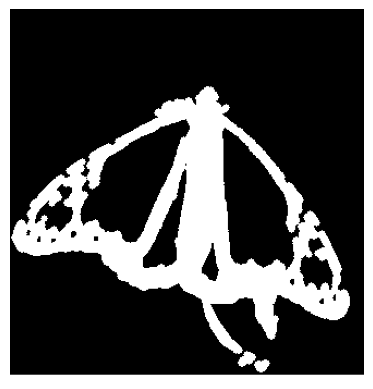

In [11]:
I_0_se_1_3 = cv2.morphologyEx(I_0_c, cv2.MORPH_CLOSE, se_1)
I_0_c_se_1_1 = cv2.bitwise_not(I_0_se_1_3)
vis(I_0_c_se_1_1)


闭运算的补集可以通过对原图像取补集，再对这个补集图像进行开运算来实现

## 3.形态学重建

![第三题](../实验代码/binary_img/第三题.png)

### a)

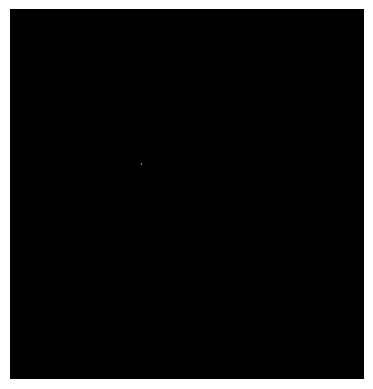

In [12]:
I_m = read_txt(r'/Users/xuefeng/Documents/数字图像处理课程/形态学实验/形态学-二值/marker.txt')
vis(I_m)

### b,c,d)

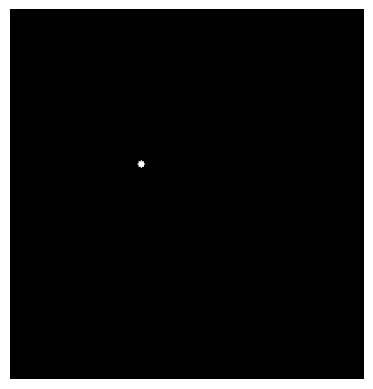

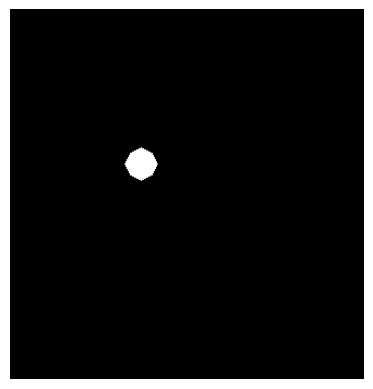

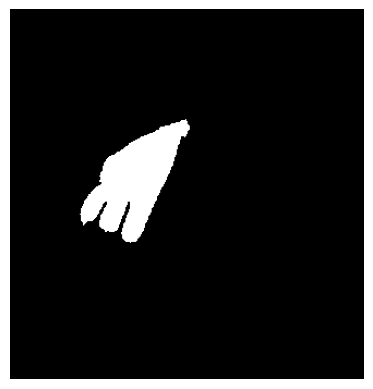

In [13]:
Ir_k = I_m.copy()

i = 0
while True:
    i += 1
    Ir_k_new = cv2.dilate(Ir_k, se_1, borderType=cv2.BORDER_REPLICATE)
    Ir_k_new = cv2.bitwise_and(Ir_k_new, I_0_c)

    if i == 1:
        Ir_1 = Ir_k_new
    if i == 5:
        Ir_5 = Ir_k_new

    if np.array_equal(Ir_k_new, Ir_k):
        break
    Ir_k = Ir_k_new
Ir_inf = Ir_k

vis(Ir_1)
vis(Ir_5)
vis(Ir_inf)


# 4.Convex Hull

![第四题](../实验代码/binary_img/第四题.png)

a,b)

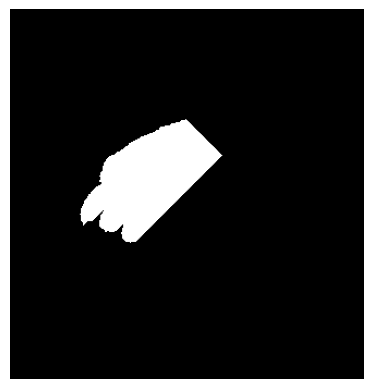

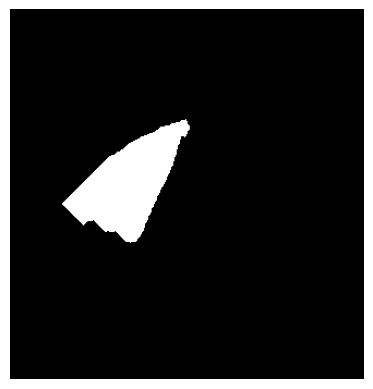

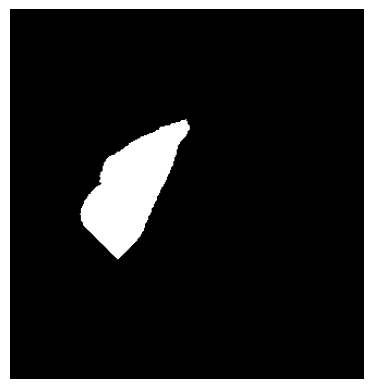

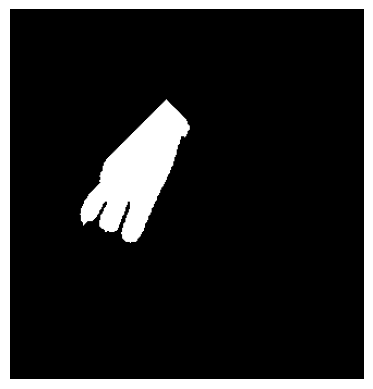

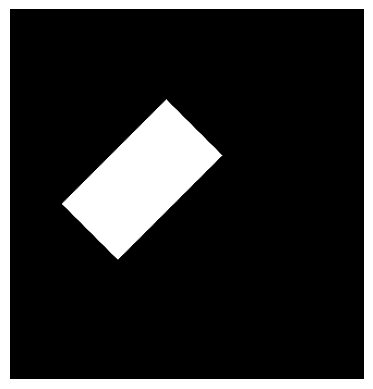

In [15]:
I_1 = Ir_inf
# vis(I_1)

structuring_elements = {}
directory = r'/Users/xuefeng/Documents/数字图像处理课程/形态学实验/形态学-二值/convex_hull_se'

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    structuring_element = read_txt(file_path)
    name, _ = os.path.splitext(filename)
    structuring_elements[name] = structuring_element

B11 = structuring_elements.get('B11')
B12 = structuring_elements.get('B12')
B21 = structuring_elements.get('B21')
B22 = structuring_elements.get('B22')
B31 = structuring_elements.get('B31')
B32 = structuring_elements.get('B32')
B41 = structuring_elements.get('B41')
B42 = structuring_elements.get('B42')

def compute_convex_hull(I, B1, B2):
    Ich_k = I.copy()
    while True:
        result_1 = cv2.erode(Ich_k, B1, borderType=cv2.BORDER_REPLICATE)
        Ich_k_c = cv2.bitwise_not(Ich_k)
        result_2 = cv2.erode(Ich_k_c, B2, borderType=cv2.BORDER_REPLICATE)

        Ich_k_new = cv2.bitwise_and(result_1, result_2)
        Ich_k_new = cv2.bitwise_or(Ich_k_new, Ich_k)

        if np.array_equal(Ich_k_new, Ich_k):
            break

        Ich_k = Ich_k_new
    return Ich_k

Ich_1_inf = compute_convex_hull(I_1, B11, B12)
vis(Ich_1_inf)
Ich_2_inf = compute_convex_hull(I_1, B21, B22)
vis(Ich_2_inf)
Ich_3_inf = compute_convex_hull(I_1, B31, B32)
vis(Ich_3_inf)
Ich_4_inf = compute_convex_hull(I_1, B41, B42)
vis(Ich_4_inf)

I_ch = cv2.bitwise_or(Ich_1_inf, Ich_2_inf)
I_ch = cv2.bitwise_or(I_ch, Ich_3_inf)
I_ch = cv2.bitwise_or(I_ch, Ich_4_inf)

vis(I_ch)